<a href="https://colab.research.google.com/github/Alenushka2013/Coursera/blob/master/125587_20_1_Practice_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

## Сравнение Дерева и Случайного Леса

In [2]:
#@title Код генерации датасета с занятия
def devil(N, D=2, K=3):
    N = 100
    D = 2
    K = 3
    X = np.zeros((N * K, D))
    y = np.zeros(N * K, dtype='uint8')

    for j in range(K):
        ix = range(N * j,N * (j + 1))
        r = np.linspace(0.0, 1, N)
        t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j

    X[:, 0] += np.random.normal(loc=0, scale=0.15, size=300)
    X[:, 1] += np.random.normal(loc=0, scale=0.15, size=300)
    return X, y

In [3]:
X, y = devil(100)

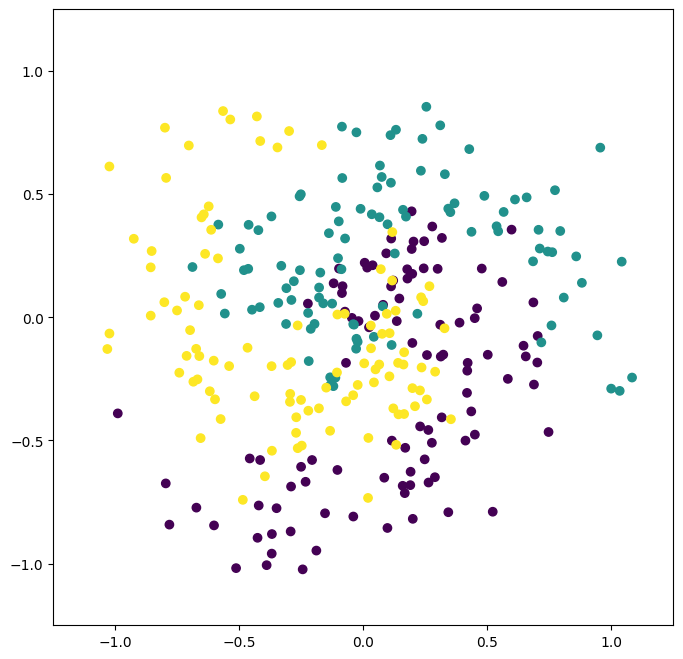

In [4]:
plt.figure(figsize=(8, 8))

plt.scatter(X[:,0], X[:,1], c=y)

plt.xlim([-1.25, 1.25])
plt.ylim([-1.25, 1.25])

plt.show()

In [5]:
models = [DecisionTreeClassifier(max_depth=10),
          RandomForestClassifier(max_depth=10)]

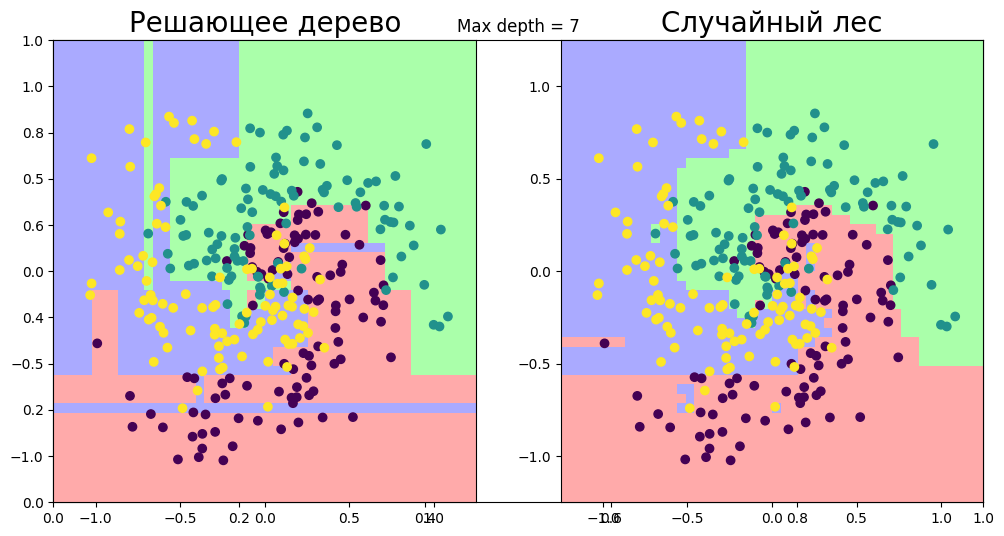

In [6]:
plt.figure(figsize=(12,6))
plt.title('Max depth = 7')

name = {0:'Решающее дерево', 1:'Случайный лес'}
for i, model in enumerate(models):
    model.fit(X, y)

    plt.subplot(1, 2, i+1)
    plt.xlim((-1.25, 1.25))
    plt.ylim((-1.25, 1.25))
    xx, yy = np.meshgrid(np.linspace(-1.25, 1.25, 50),
                         np.linspace(-1.25, 1.25, 50))
    plt.gca().set_title(name[i], fontsize=20)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

## Загрузка и исследование данных

https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?resource=download&select=train.csv

In [15]:
#df = pd.read_csv('https://dl.uploadgram.me/62def1f38f9cbh?raw')
# df1 = pd.read_csv('/content/test.csv')
# df2 = pd.read_csv('/content/train.csv')

# # Об'єднання датафреймів
# df = pd.concat([df1, df2], axis=0)  # axis=0 означає вертикальне об'єднання (по рядках)

# # Перезаписати індекси (якщо потрібно)
# df.reset_index(drop=True, inplace=True)

# # Перевіряємо результат
# print(df.shape)  # Виведе кількість рядків і стовпців у новому датафреймі


(3000, 22)


In [22]:
df = pd.read_csv('/content/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'blue'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'dual_sim'}>,
        <Axes: title={'center': 'fc'}>],
       [<Axes: title={'center': 'four_g'}>,
        <Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'n_cores'}>],
       [<Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>],
       [<Axes: title={'center': 'sc_w'}>,
        <Axes: title={'center': 'talk_time'}>,
        <Axes: title={'center': 'three_g'}>,
        <Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>],
       [<Axes: title={'center': 'price_range'}>, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >]], 

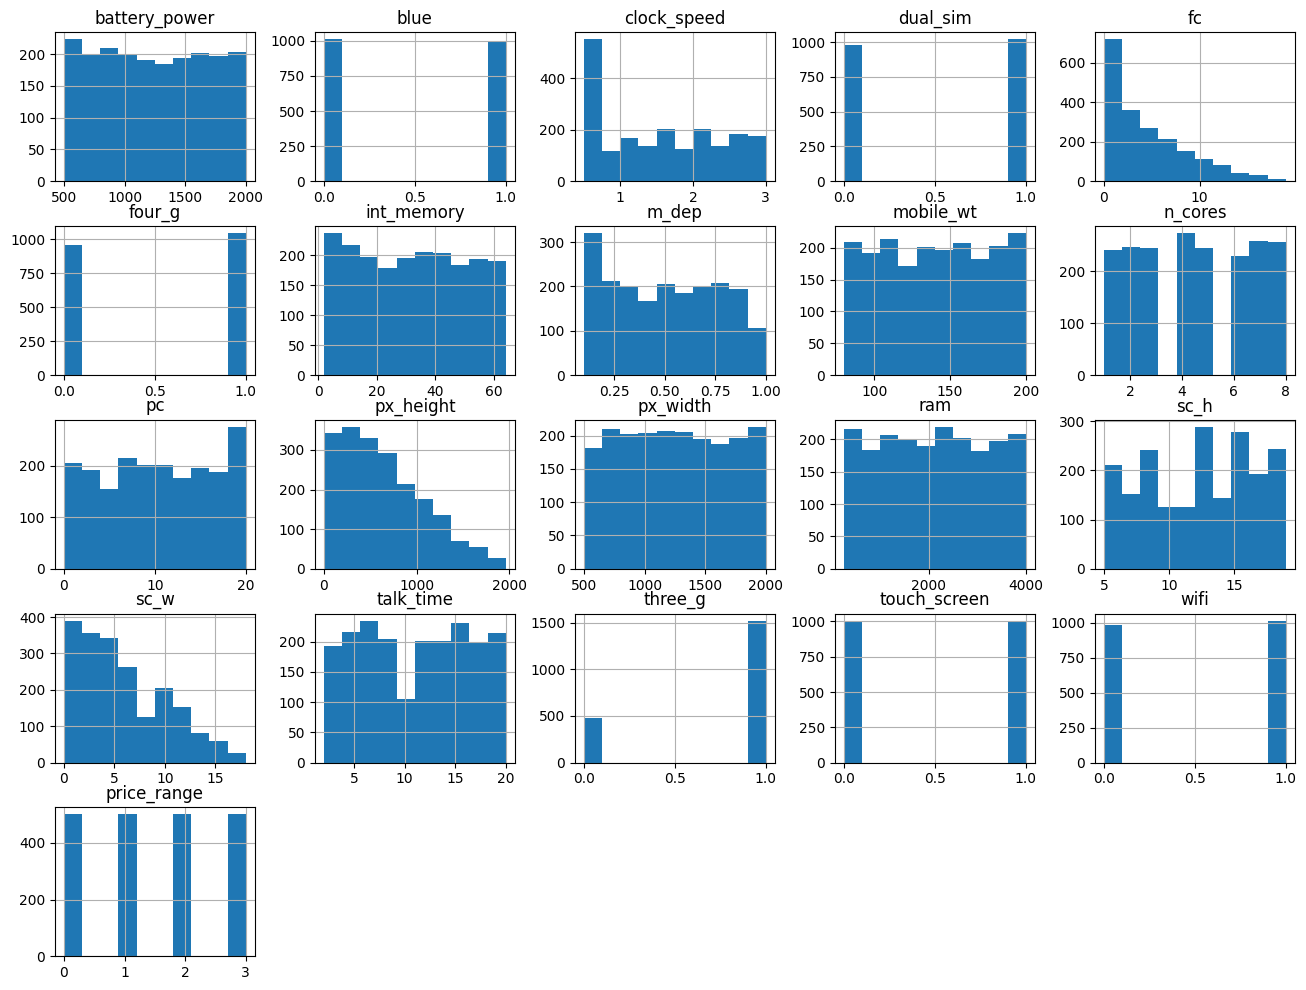

In [24]:
df.hist(figsize=(16, 12))

<Axes: xlabel='price_range', ylabel='battery_power'>

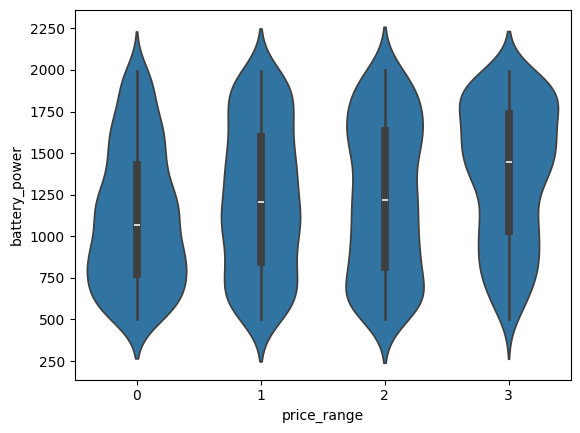

In [25]:
import seaborn as sns

sns.violinplot(x="price_range", y='battery_power', data=df)

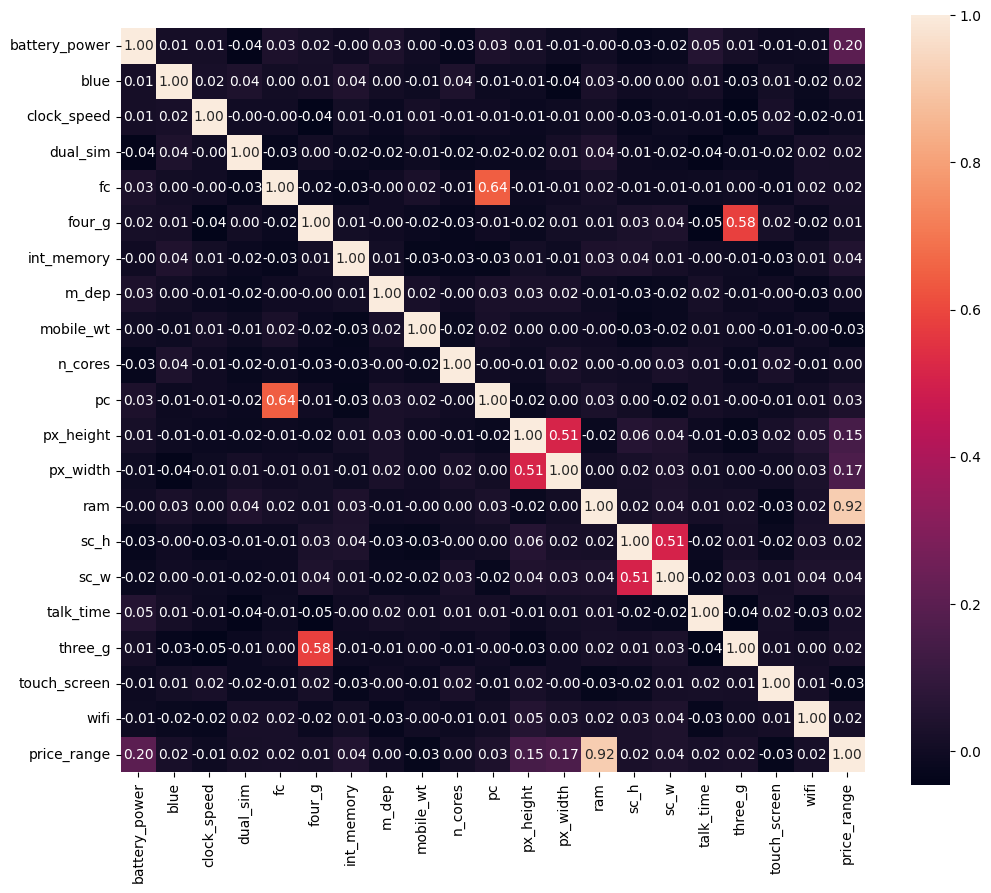

In [26]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(),fmt='.2f', square = True, annot=True)
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['price_range']), df['price_range'], test_size=0.2)

# создание и обучение алгоритма
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
from sklearn.metrics import classification_report

preds = rf.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       100
           1       0.82      0.86      0.84        92
           2       0.82      0.83      0.82       104
           3       0.96      0.89      0.93       104

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [41]:
rf = RandomForestClassifier(n_estimators=1000, criterion = 'entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [42]:
preds = rf.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       100
           1       0.83      0.91      0.87        92
           2       0.88      0.81      0.84       104
           3       0.94      0.93      0.94       104

    accuracy                           0.91       400
   macro avg       0.90      0.91      0.90       400
weighted avg       0.91      0.91      0.90       400



In [43]:
X_test.iloc[:5]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
255,973,1,1.5,0,5,1,57,0.2,190,7,16,457,1816,2977,6,4,2,1,0,0
886,878,1,1.3,0,13,1,31,0.5,153,4,18,575,618,3497,9,7,11,1,1,0
1094,688,1,1.5,0,0,0,2,1.0,89,3,2,271,869,391,5,2,8,1,1,1
1764,1811,1,2.0,0,3,1,22,0.2,82,2,8,358,614,2847,9,2,4,1,0,1
76,1114,0,2.8,0,4,1,9,0.4,197,3,15,1040,1071,907,10,7,17,1,1,0


In [44]:
print('Предсказания:')
print(rf.predict(X_test.iloc[0:5,].values))
print('Реальные ответ:')
y_test[:5].values

Предсказания:
[2 3 0 2 0]
Реальные ответ:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2, 2, 0, 2, 0])

## Сравнение с другими алгоритмами

In [45]:
from sklearn.linear_model import LogisticRegression

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
preds = tree.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       100
           1       0.82      0.77      0.79        92
           2       0.83      0.78      0.80       104
           3       0.88      0.93      0.91       104

    accuracy                           0.86       400
   macro avg       0.85      0.86      0.85       400
weighted avg       0.86      0.86      0.86       400



In [47]:
preds = lr.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       100
           1       0.60      0.65      0.62        92
           2       0.54      0.47      0.50       104
           3       0.65      0.73      0.69       104

    accuracy                           0.67       400
   macro avg       0.67      0.67      0.66       400
weighted avg       0.67      0.67      0.66       400

